# Hands-on Exercise for CLUS Module

###  Setting up necessary packages and creating data 

Import necessary packages

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



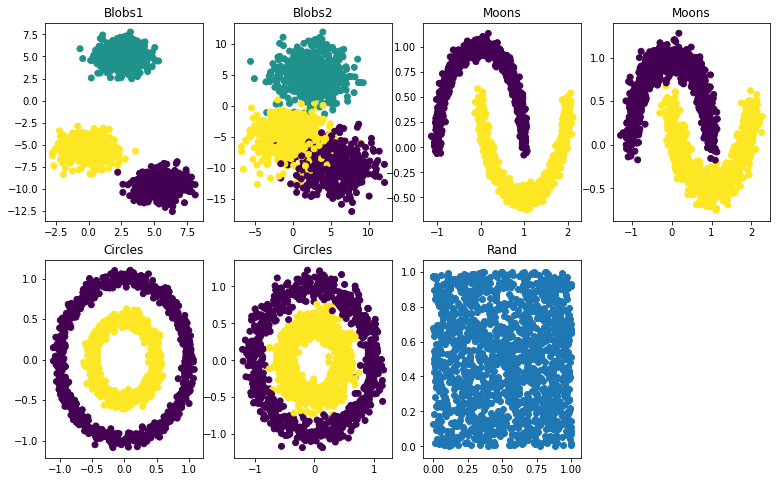

In [40]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [41]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [42]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [43]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

## 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Kmeans works well for Globular data which is well seperated. Therefor it should work best on the Blobs1 followed by Blobs2 (clusters are less far apart than in Blob1) ** </span>

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: K means won't work well on Moons and Circles. Because K means will try to locate two centroids and cluster nearest points around the centroid such that the cohesion is maximum. For Moons and circles, such a method will result in a significant mixing of two classes in a single cluster. I predict that for Circles it will be worse than the Moons.  ** </span>



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:Based on visualization following is the order of performance of kmeans:
    <br> Blob1 > Blob2 > Moons1 ~ Moons2 > Circle1 ~ Circle2 
    <br> From the figure Circles seem to be exactly half correctly clustered and Moons more than half.
    ** </span>


score (SSE) of Blob1 is 2875.57546081
score (SSE) of Blob2 is 16414.2674116
score (SSE) of Moons1 is 601.20253488
score (SSE) of Moons2 is 616.045690333
score (SSE) of Circles1 is 598.020543255
score (SSE) of Circles2 is 611.280575653


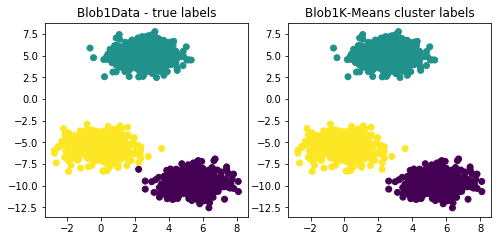

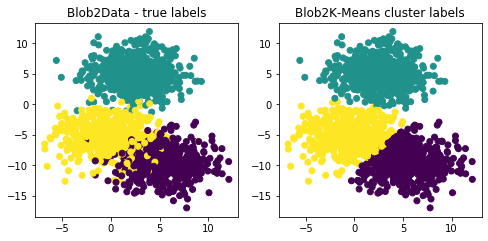

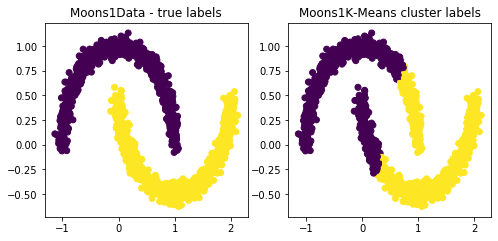

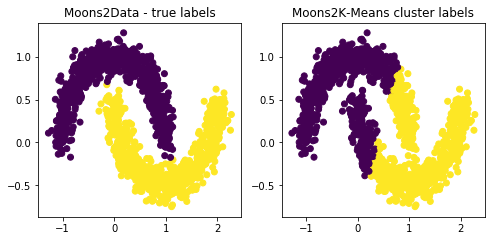

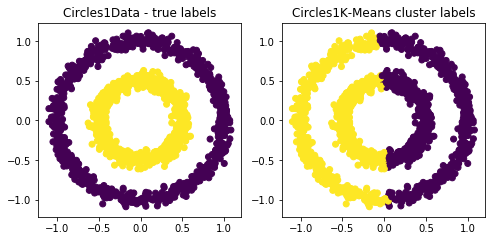

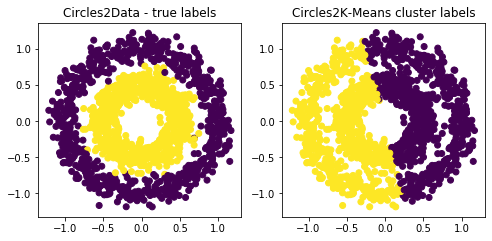

In [44]:
# Kmeans on Blobs, Moons and circles

random_state = 10
n_cluster = [3,3,2,2,2,2]
score_kmeans = []
y_pred_kmeans = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    kmeans = KMeans(n_clusters= n_cluster[i], random_state=random_state);
    y_pred_kmeans.append(kmeans.fit_predict(Data[i][0])) 
    score_kmeans.append(-kmeans.score(Data[i][0]))
    print('score (SSE) of '+ str(label[i])+ ' is '+ str(score_kmeans[i]))
    
count = 0 ;
  
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_kmeans[i])  # KMeans clusters
    plt.title(str(label[i])+'K-Means cluster labels')
    plt.show()         

    #SSE is not correct metric to compare clustering of different datasets

<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [45]:
Rand_index_kmeans = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_kmeans)) :
    Rand_index_kmeans.append(rand_index(y_pred_kmeans[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_kmeans = pd.DataFrame({"Dataset": label, "Rand_index_kmeans": Rand_index_kmeans})
Rand_score_kmeans.sort_values('Rand_index_kmeans', ascending = False)

,Dataset,Rand_index_kmeans
0,Blob1,0.999111
1,Blob2,0.920714
3,Moons2,0.624084
2,Moons1,0.620124
5,Circles2,0.499681
4,Circles1,0.499674


<span style="color:green">**Answer:Above table show datasets, arranged in descending order of Rand_index. 
    <br> As expected kmeans works best on Blob followed by Moons and Circles.** </span>



<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes, they are consistent.** </span>



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Single-link agglomerative clustering combines clusters based on smallest distance b/w any two points of the cluster. So if all the points of clusters are well seperated, single link should perform well.
    I predict Single link should work well on Blob1, Circle1 and Moon1 followed by Blob2
    <br> ** </span>



<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: If all the points of cluster are not well seperated, single link should not work well. So it should perform bad on Moon2 and Circle2.** </span>



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer: From the below visualization, single link seems to have performed in the following order:
    <br> Circle1 ~ Moon1 ~ Blob1 > Circle2 ~ Moon2 > Blob2 (Two clusters misclassified as compared to one in Moon2 & circle2)
        <br> Rationale: Proportion of data set (post Single-link agglomerative algorithm)  that visually seems to map with true clustering in the dataset
    <br> Results are unexpected from that predicted in 2a and 2b. This is because of the outlires(or noise) present in the dataset. In Blob2, Moon2, Circle2 : The outliers are getting single out as a cluster.** </span>



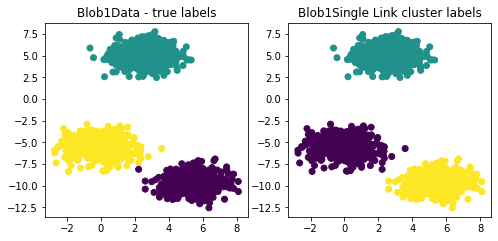

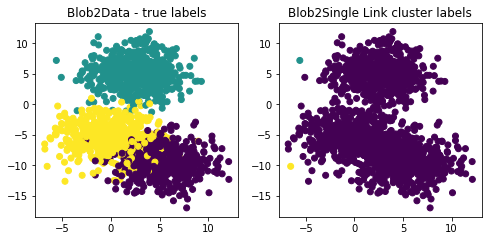

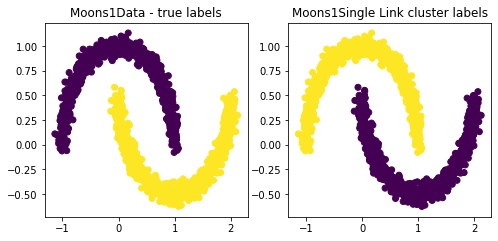

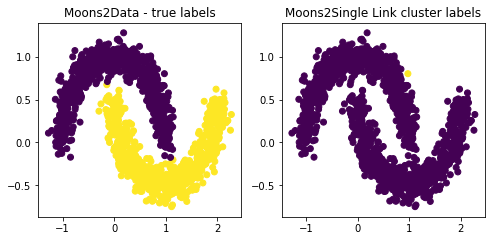

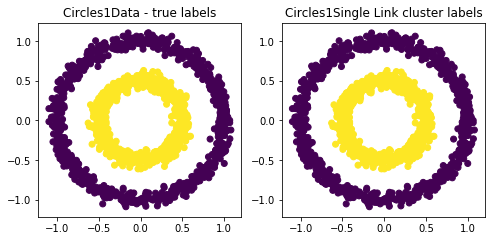

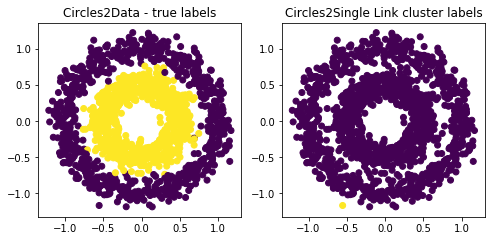

In [46]:
# Single Link agglomerative on Blobs, Moons and circles

random_state = 10
n_cluster = [3,3,2,2,2,2]

y_pred_single = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    single_link = AgglomerativeClustering(linkage="single", n_clusters=n_cluster[i]);
    y_pred_single.append(single_link.fit_predict(Data[i][0])) 


count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_single[i])  # Single Link clusters
    plt.title(str(label[i])+'Single Link cluster labels')
    plt.show()         

    #Check how to maintain the expect ratio
    #score might not be the correct measure (confirm, reason out, what does the score tell you ?)

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [47]:
Rand_index_single = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_single)) :
    Rand_index_single.append(rand_index(y_pred_single[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_single = pd.DataFrame({"Dataset": label, "Rand_index_single": Rand_index_single})
Rand_score_single.sort_values('Rand_index_single', ascending = False)

,Dataset,Rand_index_single
2,Moons1,1.000000
4,Circles1,1.000000
0,Blob1,0.999111
3,Moons2,0.499667
5,Circles2,0.499667
1,Blob2,0.333779


<span style="color:green">**Answer: Above table show datasets, arranged in descending order of Rand_index. 
    <br> Results are not exactly as intially expected.** </span>



<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: There are broadly consistent. But the results predicted before visualisation were different. This is because outliers(or noise) single out as a cluster, which i did not realise before running clustering on Blob2.  ** </span>



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Max(or complete)-link agglomerative clustering combines clusters based on largest distance b/w any two points of the cluster. Unlike single link clusters, the outliers should not lead to complete distortion.
    <br>
    <br> Since Blob1 is very well seperated and there is high cohesion within cluster, max link should also work well on it. 
    <br>** </span>



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: On booth Moons and circles the Max link should not work well.
    <br> For Circles the one part of outer circle is much far to its diametrically opposite side then the inner circle. So there should be significant overlapping in outer and inner circle. 
    <br> Similarly for Moon, the outer sides of same cluster are much farther than the adjacent inside of cluster.
    <br> Blob2, its difficult to predict. But there should be some mixing of clusters.** </span>



<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer: From the below visualization, complete link seems to have performed in the following order:
    <br> Blob1 > Blob2 > Moon1 ~ Moons2> Circle1 ~ Circle 2
    <br> Rationale: Proportion of data set (post max-link agglomerative algorithm)  that visually seems to map with true clustering in the dataset
    <br> In Moon almost 25% of data is misclassified whereas in Circles almost 50% of data is misclassified. Blob2 seems to be less than 25% misclassified (but difficult to say visually)** </span>



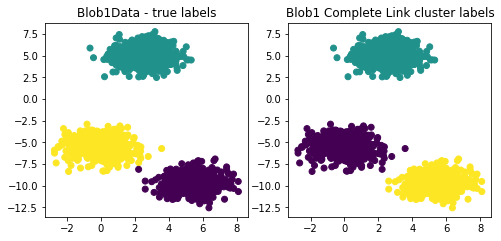

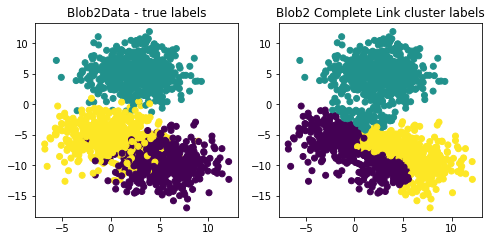

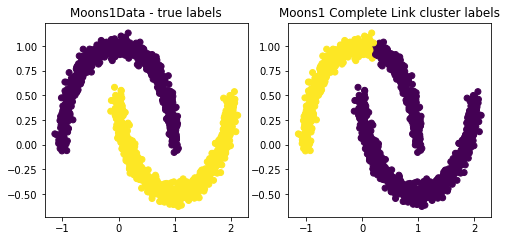

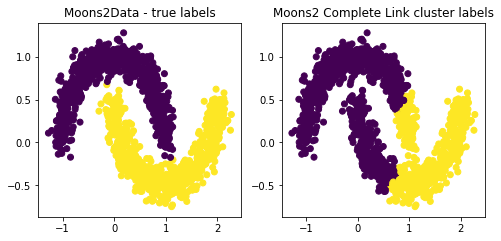

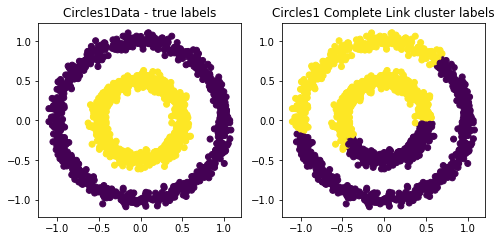

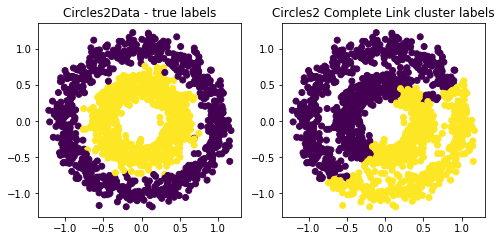

In [48]:
# Complete Link agglomerative on Blobs, Moons and circles

random_state = 10
n_cluster = [3,3,2,2,2,2]

y_pred_complete = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    complete_link = AgglomerativeClustering(linkage="complete", n_clusters=n_cluster[i]);
    y_pred_complete.append(complete_link.fit_predict(Data[i][0])) 


count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_complete[i])  # Complete Link clusters
    plt.title(str(label[i])+' Complete Link cluster labels')
    plt.show()         

    #Check how to maintain the expect ratio
    #score might not be the correct measure (confirm, reason out, what does the score tell you ?)

<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



In [49]:
Rand_index_complete = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_complete)) :
    Rand_index_complete.append(rand_index(y_pred_complete[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_complete = pd.DataFrame({"Dataset": label, "Rand_index_complete": Rand_index_complete})
Rand_score_complete.sort_values('Rand_index_complete', ascending = False)

,Dataset,Rand_index_complete
0,Blob1,0.999111
1,Blob2,0.773654
2,Moons1,0.662605
3,Moons2,0.596531
4,Circles1,0.521871
5,Circles2,0.500059


<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:Yes, the ranking are consistent with visual obervation** </span>



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Average-link agglomerative clustering combines clusters based on average distance b/w all pairs of points of the two cluster. The behaviour in this will be a combination of single link and max link clustering.
    <br>
    <br> Since Blob1 is very well seperated,there is high cohesion within cluster and it worked well with both single and max link clustering, it should also work well with Average link.  
    <br>** </span>



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Moons2 and Circles 2. As both of them neither worked well in Single or max link clustering. ** </span>



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer: From the below visualization, average link seems to have performed in the following order:
    <br> Blob1 > Moon1 ~ Moons2> Blob2 > Circle1 ~ Circle 2   
    <br> Rationale: Proportion of data set (post max-link agglomerative algorithm)  that visually seems to map with true clustering in the dataset
    <br> In Moon almost 1/4th of data is misclassified whereas in Circles almost 50% of data is misclassified. Blob2 almost 1/3rd of data seems to be misclassified** </span>



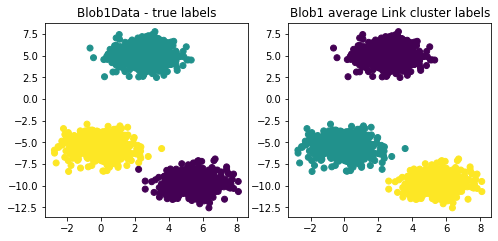

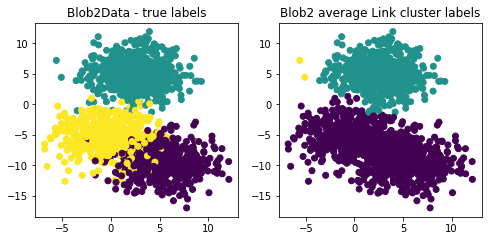

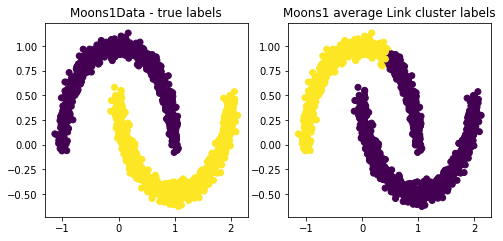

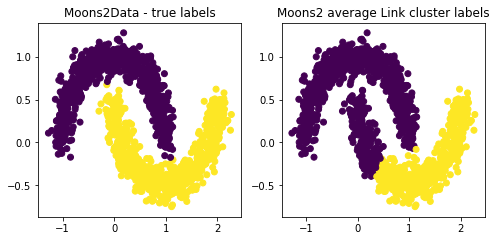

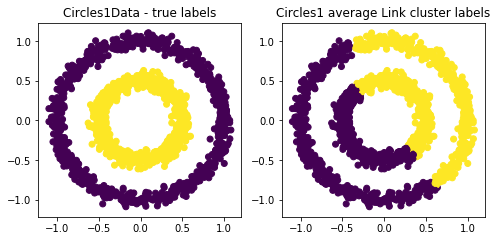

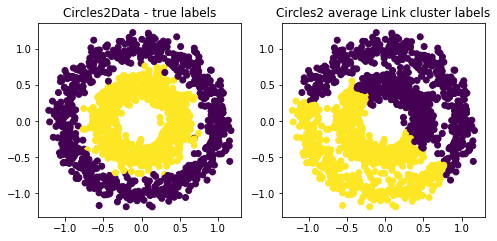

In [50]:
# Average Link agglomerative on Blobs, Moons and circles

random_state = 10
n_cluster = [3,3,2,2,2,2]

y_pred_average = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    average_link = AgglomerativeClustering(linkage="average", n_clusters=n_cluster[i]);
    y_pred_average.append(average_link.fit_predict(Data[i][0])) 


count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_average[i])  # average Link clusters
    plt.title(str(label[i])+' average Link cluster labels')
    plt.show()         



<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



In [51]:
Rand_index_average = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_average)) :
    Rand_index_average.append(rand_index(y_pred_average[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_average = pd.DataFrame({"Dataset": label, "Rand_index_average": Rand_index_average})
Rand_score_average.sort_values('Rand_index_average', ascending = False)

,Dataset,Rand_index_average
0,Blob1,0.999111
1,Blob2,0.763658
3,Moons2,0.745765
2,Moons1,0.713231
5,Circles2,0.505078
4,Circles1,0.500414


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:Boradly its consistent. Only thing is Blob2 is comparable to Moons, whereas from visualization Blob2 appeared better ( 1/3 data misclassified compared to 1/4 th in Moon). But seems like 1/3 and 1/4th were wrong visual approximations.** </span>



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: DBSCAN identifies clusters by connecting all the core points in neighbourhood together, thus identifying even dense non - globular clusters well. 
    <br> Its expected to work well for Moon, Circles and Blob1 Dataset . 
    <br> Moon and Circles have dense cluster points, with distinct seperation although small. 
    <br> Blob1 is also having dense clusters, which are very well seperated. ** </span>



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Its not expected to work well on Blob2 dataset, because the core points of the bottom two clusters are not well seperated. Hence there is tendency to combine both the bottom clusters. ** </span>




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:From the below visualization, DBSCAN seems to have performed in the following order:
    <br>   Blob1 ~ Moon1 ~ circle1> Moon2 > Circle2 > Blob2   
    <br> Rationale: Proportion of data set (post max-link agglomerative algorithm)  that visually seems to map with true clustering in the dataset
    <br> Blob1, Moon1, Circle1 have very clear distince clusters. Moon 2 and Circle 2 have more noise due to high variance in the data. Blob2 it preforms bad as the bottom two clusters tend to merge. ** </span>



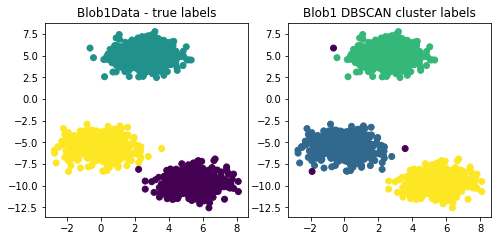

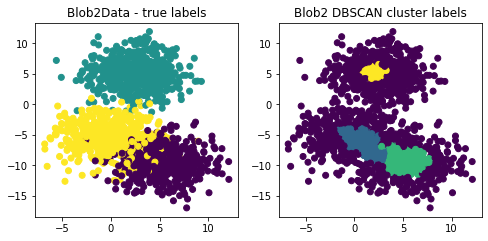

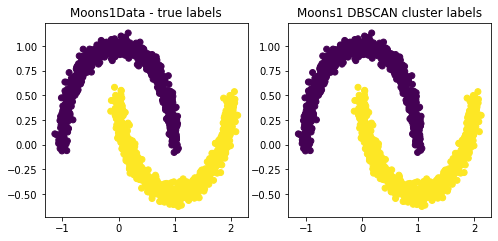

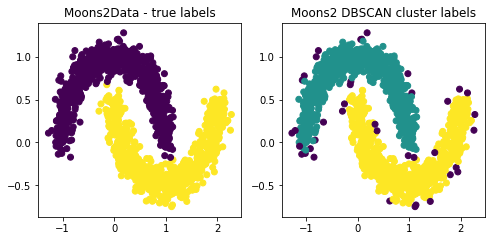

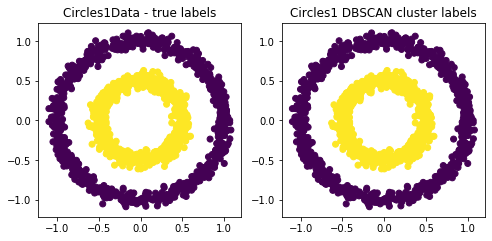

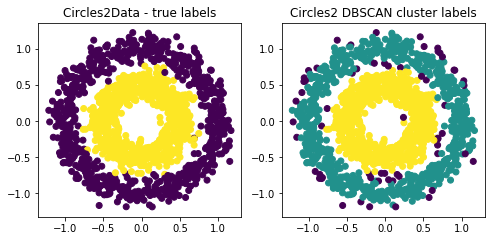

In [52]:
random_state = 10
# n_cluster = [3,3,2,2,2,2]
eps = [1,1.11,0.2,0.1,0.1,0.1]
min_samples =[10,50,10,9,10,9]

# dbscan = DBSCAN(eps=1, min_samples=10)
# y_pred = dbscan.fit_predict(Blobs1_X)

y_pred_dbscan = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[i]);
    y_pred_dbscan.append(dbscan.fit_predict(Data[i][0])) 


count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_dbscan[i])  # average Link clusters
    plt.title(str(label[i])+' DBSCAN cluster labels')
    plt.show()         



<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

<span style="color:green">**Answer: Moon1, Circle1 and Blob1 have the least noise points. This is because all points are loacted in proximity (adjacent to other points).There are no outliers or points having far away neighbours. ** </span>



In [53]:
# Noise points
noise = [np.sum(y_pred_dbscan[i] == -1) for i in range(len(y_pred_dbscan))]
# Unique clusters
n_clusters = [(np.unique(y_pred_dbscan[i]).size - np.any(y_pred_dbscan[i] == -1)) for i in range(len(y_pred_dbscan))]

Noise = pd.DataFrame({'Dataset': label, 'Noise':noise, 'No. of Clusters': n_clusters})
Noise.sort_values('Noise')

,Dataset,Noise,No. of Clusters
2,Moons1,0,2
4,Circles1,0,2
0,Blob1,3,3
3,Moons2,39,2
5,Circles2,61,2
1,Blob2,990,3


<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer: The below table summarizes the rand-index score.** </span>



Assigning noise points a different positive class! 

In [54]:
## Assign Noise points a class label = 5 (can be anything greater than 3)

for i in range(len(y_pred_dbscan)) :
    y_pred_dbscan[i] = np.where(np.array(y_pred_dbscan[i])== -1, 5, np.array(y_pred_dbscan[i]))


Rand_index_dbscan = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_dbscan)) :
    Rand_index_dbscan.append(rand_index(y_pred_dbscan[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_dbscan = pd.DataFrame({"Dataset": label, "Rand_index_dbscan": Rand_index_dbscan})
Rand_score_dbscan.sort_values('Rand_index_dbscan', ascending = False)

,Dataset,Rand_index_dbscan
2,Moons1,1.000000
4,Circles1,1.000000
0,Blob1,0.997782
3,Moons2,0.974327
5,Circles2,0.952451
1,Blob2,0.564125


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes, they are consistent.** </span>



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Spectral clustering tries to maximise affinity within a cluster and minimize it between clusters. It works well on non-convex clusters. Therefore its expected to work well on Blob1 and Blob2.
    <br> ** </span>



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datas
ets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer: Moons and Circles are not expected to work well with spectral clustering because, the affinity (closeness) of points from different clusters is high. The clusters are nested or intertwined (convex like) because of which the points are expected to be misclassified. 
    <br>
      <br> Choice of kernel for affinity will also impact the results, but assuming that affinity is closely related to closeness in ecludian space above is the predicted behaviour.  ** </span>



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer: Based on visual observation, below is the order of performance
    <br> Blob1 ~ Blob2 > Moon1 ~ Moon2 > Circle1 ~ Circle2 
    <br> Rationale: For Moons missclassification is approximately around 30% whereas for circles it appears to be around 50%. ** </span>



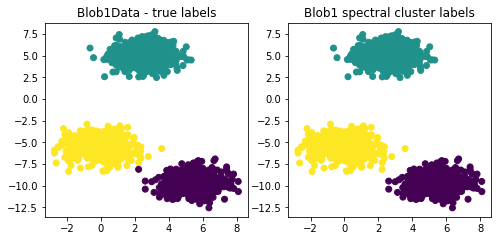

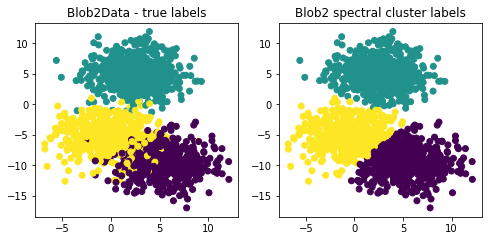

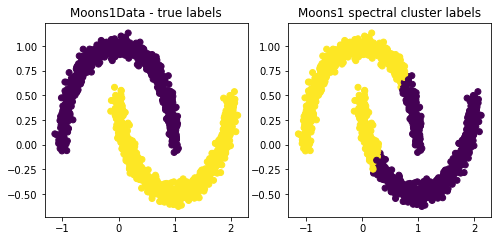

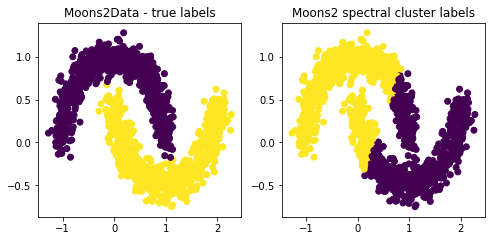

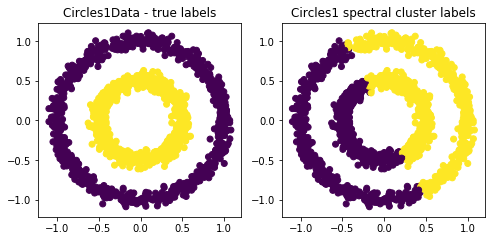

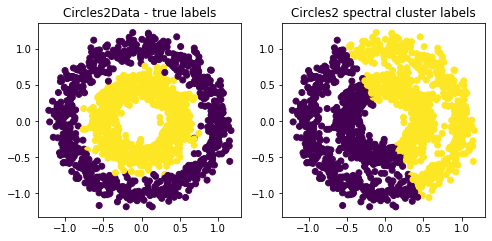

In [80]:
# Spectral clustering on Blobs, Moons and circles

random_state = 10
n_cluster = [3,3,2,2,2,2]

y_pred_spectral = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y]]

for i in range(len(label)):
    spectral = SpectralClustering(n_clusters=n_cluster[i], random_state=random_state);
    y_pred_spectral.append(spectral.fit_predict(Data[i][0])) 


count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(8, 25))  
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=Data[i][1]) # true clusters
    plt.title(str(label[i])+'Data - true labels')
    count = count + 1
    plt.subplot(len(label),2,count)
    plt.scatter(Data[i][0][:, 0], Data[i][0][:, 1], c=y_pred_spectral[i])  # average Link clusters
    plt.title(str(label[i])+' spectral cluster labels')
    plt.show()


<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



In [81]:
Rand_index_spectral = []
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2']
for i in range(len(y_pred_spectral)) :
    Rand_index_spectral.append(rand_index(y_pred_spectral[i],Data[i][1]))

#Data frame: stitching Label and Rand score

Rand_score_spectral = pd.DataFrame({"Dataset": label, "Rand_index_spectral": Rand_index_spectral})
Rand_score_spectral.sort_values('Rand_index_spectral', ascending = False)

,Dataset,Rand_index_spectral
0,Blob1,0.999111
1,Blob2,0.919190
3,Moons2,0.644844
2,Moons1,0.644126
5,Circles2,0.499755
4,Circles1,0.499667


<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Rand Index of circles is better than that of Moons, which appears opposite from that in visualization. May be its because the way density of points is distributed in the figure because of which in Moons the misclassification case is more than Circles.  ** </span>



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer: A good clustering features will be high internal cohesion and high seperation between cluster. Visually seeing, all datasets except Randome have a good clustering tendency. 
    <br> I expect clustering tedency of low variance dataset in each type to be more than that of high variance. ** </span>



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Random dataset does not show good clustering tendency, because there are no high density region of points anywhere either globular or convex or nested. The points are randomly distributed.** </span>



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

<span style="color:green">**Answer:Below is the table** </span>



In [57]:
Data = [[Blobs1_X, Blobs1_y],[Blobs2_X, Blobs2_y],[Moons1_X, Moons1_y],[Moons2_X, Moons2_y],
        [Circles1_X, Circles1_y],[Circles2_X, Circles2_y],[Rand_X,Rand_X[:,1]]]
label = ['Blob1', 'Blob2','Moons1','Moons2','Circles1','Circles2','Random']
hopkin = []

for i in range(len(Data)):
    hopkin.append(hopkins(Data[i][0]))
    
hop = pd.DataFrame({'Dataset': label, 'Hopkin Statistic': hopkin})
hop.sort_values('Hopkin Statistic', ascending = False)

,Dataset,Hopkin Statistic
0,Blob1,0.948152
2,Moons1,0.912192
3,Moons2,0.866294
1,Blob2,0.843782
4,Circles1,0.832384
5,Circles2,0.742496
6,Random,0.585269


<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer: Yes, it is consistent, Hopkins statistic of 0.5 shows a random dataset (no clustering tendency) whereas that of close to 1 show a high clustering tendency.** </span>



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

<span style="color:green">**Answer:
    <br> kmeans - 3 centorids are located in order to minimise SSE. Hence the expected classification.
    <br> gmm - Its effectively kmeans with probabilities of cluster assignments and hence the shape is similar to the kmeans. 
    <br> Single Link - since the smallest distance b/w any two points of a cluster is used to join the clusters, two outliers are singled out as individual clusters and hence this shape. 
    <br> Complete Link - Since the max distance b/w points are used to join the clusters, its expected to get 3 distinct clusters.
    <br> Average Link - It should be similar to complete link because tha average distance between the points of cluster is used to join the clusters. 
    <br> DBSCAN - All the points get labelled as Noise or all get labelled as Core (depending on choice of eps and min_points). Hence there are no distinct quality clusters are obtained. 
    <br> Specctral - It uses kmeans in the eigenspace obtained from affinity matrix. Hence behaves similar to kmeans ** </span>



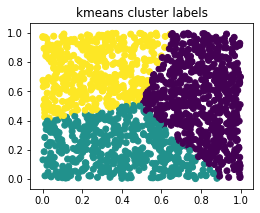

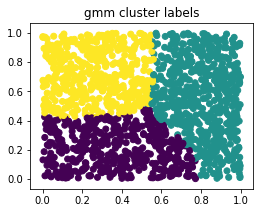

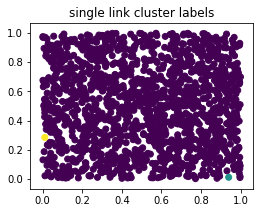

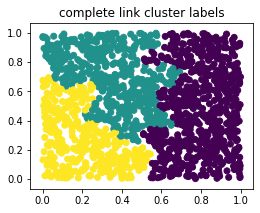

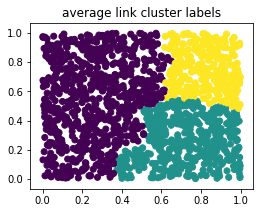

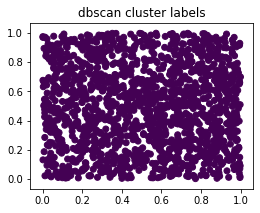

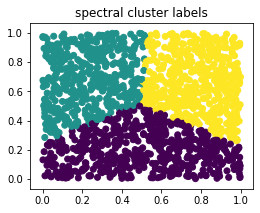

In [58]:
n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_kmeans = kmeans.fit_predict(Rand_X)

# EM/Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
y_gmm = gmm.fit_predict(Rand_X)

single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_single = single_linkage.fit_predict(Rand_X)


complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_complete = complete_linkage.fit_predict(Rand_X)

average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_average = average_linkage.fit_predict(Rand_X)


dbscan = DBSCAN(eps=0.1, min_samples=10)
y_dbscan = dbscan.fit_predict(Rand_X)


spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_spectral = spectral.fit_predict(Rand_X)

y_pred = [y_kmeans,y_gmm,y_single,y_complete,y_average,y_dbscan,y_spectral]
label = ['kmeans', 'gmm', 'single link', 'complete link', 'average link', 'dbscan', 'spectral']

#Plot using each algorithm (No need to plot true data )

count = 0 ;    
for i in range(len(label)):  
    count = count + 1 
    fig, ax = plt.subplots(figsize=(4, 25))  
    plt.subplot(len(label),1,count)
    plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred[i])  # average Link clusters
    plt.title(str(label[i])+' cluster labels')
    plt.show()



### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [59]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [60]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

Class labels are:

In [61]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

Create dataset for classification

In [62]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [63]:
Cancer_X.shape

(569, 30)

In [64]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [77]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

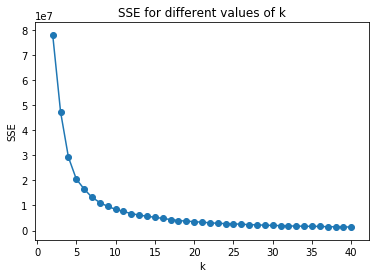

In [79]:
#Plotting SSE

plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:k = 8, as after that rate of decrease of SSE is significantly low.** </span>



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

In [67]:
# Cancer_X = cancer.data
# Cancer_y = cancer.target
k = 7
kmeans = KMeans(n_clusters= k, random_state=random_state);
y_Cancer = kmeans.fit_predict(Cancer_X)

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

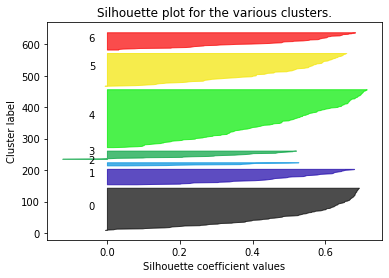

In [68]:
#Plotting

silhouette(Cancer_X,y_Cancer)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer: Clusters with high avg. +ve silhouette coefficient will form the good clusters. 
    <br> Cluster 2 and 3 are very small and not-so-good with avg low silhouette values (less than 0.3). Rest clusters are also better with silhouette value of around 0.45, but far less than ideal 1. 
    <br> .** </span>



In [82]:
# Computing avg silhouette at cluster level
sample_silhouette_values = silhouette_samples(Cancer_X, y_Cancer)

# creating data frame
sil = pd.DataFrame({'silhouette':sample_silhouette_values, 'Cluster': y_Cancer})

# grouping and mean at cluster level

silhouette = sil.groupby('Cluster').mean()
cluster_size = sil.groupby('Cluster').count()

#combine

cancer_sil = pd.concat([silhouette,cluster_size], axis =1)
cancer_sil.columns = ['average sil','cluster size']
cancer_sil

,average sil,cluster size
Cluster,,
0,0.519379,135
1,0.480080,50
2,0.327354,11
3,0.300569,27
4,0.472951,185
5,0.455625,105
6,0.444736,56


<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [83]:
rand_index(y_Cancer,Cancer_y)


0.61672318621748068

<span style="color:green">**Answer: Rand Index (TP + TN)/(TP+TN+FP+FN) has a low value, only 61% of the cases are correctly classified. ** </span>



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

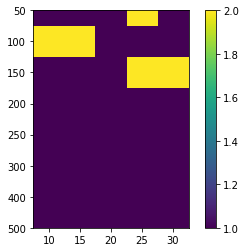

,10,15,20,25,30
50,1,1,1,2,1
100,2,2,1,1,1
150,1,1,1,2,2
200,1,1,1,1,1
250,1,1,1,1,1
300,1,1,1,1,1
400,1,1,1,1,1
500,1,1,1,1,1


In [71]:
eps = [50, 100, 150, 200, 250, 300, 400, 500] 
min_samples = [10, 15, 20, 25, 30]

#no. of clusters 8X5 matrix

y_cancer_dbscan = []
clusters = []

# np.array : 8x5

for i in range(len(eps)):
    for j in range(len(min_samples)) :
        dbscan = DBSCAN(eps=eps[i], min_samples= min_samples[j]) 
        y_cancer_dbscan.append(dbscan.fit_predict(Cancer_X))
        clusters.append(max(dbscan.fit_predict(Cancer_X))+1)
        
# reshape into 8x5 , set names

# np.array(y_cancer_dbscan).size
b = np.array(clusters).reshape(8,5)

plt.imshow(b)
nx = b.shape[1]
no_labels = len(min_samples)
step_x = int(nx / (no_labels - 1))
x_positions = np.arange(0,nx,step_x)
plt.xticks(x_positions, min_samples)

ny = b.shape[0]
no_labels = len(eps)
step_y = int(ny / (no_labels))
y_positions = np.arange(0,ny,step_y)
plt.yticks(y_positions, eps)
plt.colorbar()
plt.show()


# ##
# plt.imshow(hist, cmap='Reds')
# x = np.arange(80,122,2) # the grid to which your data corresponds
# nx = x.shape[0]
# no_labels = 7 # how many labels to see on axis x
# step_x = int(nx / (no_labels - 1)) # step between consecutive labels
# x_positions = np.arange(0,nx,step_x) # pixel count at label position
# x_labels = x[::step_x] # labels you want to see
# plt.xticks(x_positions, x_labels)

min_s = [str(i) for i in min_samples]
eps_i = [str(i) for i in eps]

c = pd.DataFrame(b, columns = min_s, index= eps_i)
c


<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

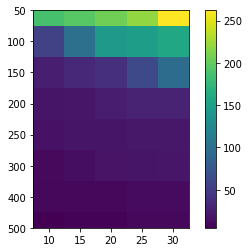

,10,15,20,25,30
50,187,195,206,220,262
100,56,100,143,148,158
150,27,34,41,62,96
200,20,21,25,31,31
250,18,20,20,22,22
300,12,15,19,20,21
400,11,11,11,13,13
500,5,8,8,11,11


In [72]:
eps = [50, 100, 150, 200, 250, 300, 400, 500] 
min_samples = [10, 15, 20, 25, 30]

#no. of clusters 8X5 matrix

y_cancer_dbscan = []
Noise = []

# np.array : 8x5

for i in range(len(eps)):
    for j in range(len(min_samples)) :
        dbscan = DBSCAN(eps=eps[i], min_samples= min_samples[j]) 
        y_cancer_dbscan.append(dbscan.fit_predict(Cancer_X))
        Noise.append(sum(dbscan.fit_predict(Cancer_X)==-1))
# reshape into 8x5 , set names

# np.array(y_cancer_dbscan).size
b = np.array(Noise).reshape(8,5)

plt.imshow(b)
nx = b.shape[1]
no_labels = len(min_samples)
step_x = int(nx / (no_labels - 1))
x_positions = np.arange(0,nx,step_x)
plt.xticks(x_positions, min_samples)

ny = b.shape[0]
no_labels = len(eps)
step_y = int(ny / (no_labels))
y_positions = np.arange(0,ny,step_y)
plt.yticks(y_positions, eps)
plt.colorbar()
plt.show()

min_s = [str(i) for i in min_samples]
eps_i = [str(i) for i in eps]

c = pd.DataFrame(b, columns = min_s, index= eps_i)
c




Noise points are much lower when minimum points is low and eps is high

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:Mostly number of clusters are either 1 or 2
    <br> Noise points are less when min_samples is low and eps is high** </span>



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [73]:
dbscan = DBSCAN(eps= 50, min_samples= 25) 
y_dbscan = dbscan.fit_predict(Cancer_X)

y_dbscan = np.where(y_dbscan  == -1, 4, y_dbscan )
    
## Assign Noise points a class label = 2 (can be anything greater than 0)
    
rand_index(y_dbscan,Cancer_y)

# 0.74196143468897746

0.78857149929453696

Since the origional data has 2 clusters, i'll choose the eps and min_samples such that clusters is 2 and rand score is maximum


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer: Rand Index of dbscan (eps = 50, min_samples = 25) is much higher than kmeans, thus dbscan is giving better clusters.
    Cluster in d dimension should be non-globular and dense (possibly convex, nested)
    <br> But challenge here is that with dbscan there is 220 Noise points (almost 30% of data !)** </span>



In [74]:
# Distribution of orgional class labels
unique_elements, counts_elements = np.unique(Cancer_y, return_counts=True)
np.array([unique_elements, counts_elements])

array([[  0,   1],
       [212, 357]])

Rand Index may not be the right measure to compare since the classes are disproportionately distributed in the origional dataset. Instead we should compute FPR and FNR as a measure of comparison.

Also there is a limitation in comparison, since due to high Noise points dbscan only partially classifies the data whereas kmeans is trying to classify all th points in data. 